In [70]:
import pandas as pd

In [71]:
df = pd.read_csv("train.csv")

In [72]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [73]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [75]:
print(df.columns)

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


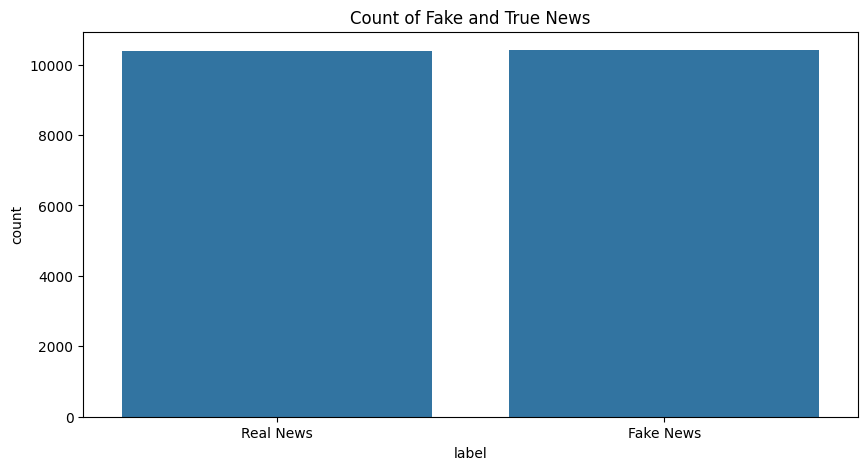

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# Check the columns in your DataFrame
print(df.columns)

# Clean 'label' column if necessary
df = df.dropna(subset=["label"])

# Plot the countplot for the 'label' column
fig = plt.figure(figsize=(10, 5))
graph = sns.countplot(x="label", data=df)
plt.title("Count of Fake and True News")

# Customize the labels
plt.xticks(ticks=[0, 1], labels=['Real News', 'Fake News'])

# Show the plot
plt.show()


In [77]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [78]:
df=df.fillna('')

In [79]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [80]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [81]:
df=df.drop(['id', 'title', 'author'], axis=1)

In [82]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [83]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [84]:
port_stem=PorterStemmer()

In [85]:
port_stem

<PorterStemmer>

In [86]:
port_stem.stem("Hi thIs is RAHAT * % %@@@")

'hi this is rahat * % %@@@'

In [87]:
def stemming(content):
    con=re.sub('[^a-zA-Z]', ' ', content)
    con=con.lower()
    con=con.split()
    con=[port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con=' '.join(con)
    return con

In [88]:
stemming('Hi this is SALAHUDDIN RAHAT')

'hi salahuddin rahat'

In [89]:
df['text']= df['text'].apply(stemming)

In [90]:
x=df['text']
y=df['label']
y.shape

(20800,)

In [91]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.20)

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

In [93]:
x_test.shape

(4160, 98475)

In [94]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [95]:
prediction=model.predict(x_test)
prediction

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [96]:
model.score(x_test, y_test)

0.8896634615384615

In [97]:
import pickle

In [98]:
pickle.dump(vect, open('vector.pkl', 'wb'))

In [99]:
pickle.dump(model, open('model.pkl', 'wb'))

In [100]:
vector_form=pickle.load(open('vector.pkl', 'rb'))

In [101]:
load_model=pickle.load(open('model.pkl', 'rb'))

In [102]:
def fake_news(news):
    news=stemming(news)
    input_data=[news]
    vector_form1=vector_form.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction

In [103]:
val=fake_news(""""It was not even a month ago that Mayor Bill de Blasio led a boisterous rally in Foley Square to celebrate the passage of key elements of his affordable housing plan. It was meant to be a pivotal moment in Mr. de Blasioâ€™s tenure, a victory that would position him to better attend to New York Cityâ€™s    needs  â€”   something of a requisite as he approaches   next year. In the past two weeks, though, the mayorâ€™s fortunes have swung wildly in the opposite direction. His ability and style as a manager have come under excruciating scrutiny, as four separate investigative agencies pursue inquiries into possible wrongdoing on the part of his administration. Mr. de Blasio, a Democrat, has been peppered with uncomfortable questions at news conferences and on national television, at a time when he hoped to be acting as a liberal   for Hillary Clinton ahead of New Yorkâ€™s presidential primary on Tuesday. Instead, the mayor has repeatedly pleaded ignorance about the questionable actions of city agencies, all but undoing recent attempts by close aides to portray him as an adroit manager of a sprawling city bureaucracy that critics initially said he was too inexperienced or too ideological to handle effectively. Despite Mr. de Blasioâ€™s centralized management style  â€”   marked by memos on key decisions and a desire for City Hall to weigh in on seemingly minor matters  â€”   he has repeatedly said he was left in the dark as problems percolated. And though he has tried to go even deeper into the minutiae of municipal governance, his focus on details, as described by close aides, has not extended to the subjects of the investigations. In March, the city comptrollerâ€™s office opened an inquiry into a   change to a deed that allowed a nursing home on the Lower East Side of Manhattan to be converted to the type of luxury apartments the mayor has said he wants to limit. Mr. de Blasio said he first learned of the matter from news reports. Less than two weeks later, the mayor learned of a federal corruption investigation into top Police Department officials. The inquiry revolved around two of Mr. de Blasioâ€™s   political supporters and appeared to extend into his   efforts more broadly. Not long after that, the mayor had to explain confusion in his administration over whether work on a crucial water tunnel that would serve Brooklyn and Queens had been delayed. In addition to the federal inquiry and the one by the comptroller, investigations are underway into the nursing home deal by the state attorney general, Eric T. Schneiderman, and the cityâ€™s Investigation Department. Mr. de Blasio, who spent much of his first year as mayor focused on providing universal prekindergarten and much of the second year on his affordable housing initiative, said in an interview last month that he was intent on pressing ahead with an aggressive policy agenda. â€œWe are going up the ambition scale here,â€ he said of his next goals: reducing homelessness, improving mental health services and addressing the dirt and disorder that tarnish the quality of New Yorkersâ€™ lives. The de Blasio administration wants to combine those goals with an effort to overcome the mayorâ€™s image as a leader more interested in making grand pronouncements than filling potholes. It was a perception shaped by numerous missteps in Mr. de Blasioâ€™s first two years in office: late arrivals to events, public comments that alienated an already skeptical police force, a feud with Gov. Andrew M. Cuomo, his fellow Democrat. That image, which Mr. de Blasio has worked hard to shed, lent credibility to the notion that he could be vulnerable in the 2017 election, with potential challenges from both the right and left. But before the investigations came to light, Mr. de Blasio enjoyed rising popularity in polls, with no prominent Democrat emerging as a serious rival. Now the inquiries  â€”   as well as a   joke the mayor made during a skit he performed with Mrs. Clinton on Saturday  â€”   have put Mr. de Blasio back on his heels. â€œHe appears to be the type of political leader that those type of allegations accrue to,â€ said Don Levy, director of the Siena Research Institute, which conducts political polls. â€œA few years into his administration, his armor has taken a few hits and his accomplishments at this point just donâ€™t seem to have turned the tide on a growing narrative of his not being effective. â€ Mr. de Blasio has said he was not immediately informed about a separate federal investigation, also by the United States attorney for the Southern District, Preet Bharara, into the New York City Housing Authority, which began turning over millions of documents last year. Likewise, the mayor said he first heard of the federal corruption investigation involving the donors, Jeremiah Reichberg and Jona S. Rechnitz, from news reports this month. The police commissioner, William J. Bratton, has said the federal authorities told him of the widening investigation in 2014. (At the time, people briefed on the matter have said, the focus was on Philip Banks III, then the   uniformed officer, and Norman Seabrook, the head of the city correction officersâ€™ union.) City officials have said Anthony E. Shorris, the first deputy mayor, knew about the circumstances surrounding the lifting of the deed restriction on the nursing home weeks before the mayor said he became aware. The property was sold to condominium developers for $116 million in February after the Department of Citywide Administrative Services agreed to lift the restriction, which would have prevented the transaction. City officials said Mr. Shorris wanted to understand the matter fully before informing Mr. de Blasio. Two former city officials familiar with City Hallâ€™s working said the mayorâ€™s desire to closely manage decisions  â€”   and his displeasure when subordinates failed to answer his detailed questions  â€”   could backfire at times, making agency officials wary of bringing potentially troublesome issues to him in their early stages. One former official said that on several occasions, Mr. de Blasio said he had not been informed about an issue, when there was evidence that he had been, either by email or in person. The mayor would say he had not read the emails, the official said. Both officials, who still work in New York City, requested anonymity to speak about the administrationâ€™s internal operations. â€œThe mayor is driven and passionate and holds his people accountable,â€ said Phil Walzak, a chief adviser to Mr. de Blasio. â€œPeople want to take information to the mayor when thereâ€™s a problem identified and some recommendations that can be made. I donâ€™t know that people are reluctant to talk to him. I wouldnâ€™t agree with that assessment. â€ Mr. Walzak said the investigations had not dampened progress on the mayorâ€™s agenda. â€œThe mission of the administration is going to continue forward,â€ he said. In recent months, Mr. de Blasio has also moved beyond criticizing the previous administrationâ€™s failures and has begun celebrating the city and a trajectory that he can claim as his own. How far Mr. de Blasioâ€™s new approach will carry him, as attention remains focused on the investigations, is an open question. In the interview last month, Mr. de Blasio said that he would be personally involved in the planning and execution of what he called â€œnew, prominent efforts,â€ attending meetings and making sure that subordinates retained a sense of urgency. â€œIn any one of these efforts I set the strategic template,â€ he said, â€œand that can mean agreeing to a vision, to a set of strategies and tactics that my team develops. â€ But on Monday, as Mr. de Blasio announced changes to how his administration handled homeless people, he faced repeated questions about the investigations and his   practices. â€œIâ€™m happy to take questions today, but Iâ€™m not going to be speaking about this after today,â€ he said. But two days later, he was answering more questions about the investigations  â€”   and about his skit with Mrs. Clinton  â€”   after an event held by the Rev. Al Sharpton, where she also spoke. â€œGlad we focused on the important issues of the day,â€ he said sarcastically to reporters before walking off..""")

In [104]:
if val==[0]:
    print('reliable')
else:
    print('unreliable')

reliable
